In [338]:
[int(x) for x in np.linspace(start = 10, stop = 50, num = 3)]
[int(x) for x in np.linspace(start = 5, stop = 25, num = 3)]

[5, 15, 25]

# user input

In [1]:
basePath = '~/Documents/kagglai/'
srcPath = 'src'
dataPath = 'dat'

projectName = 'houseprices'

randomSeed = 0

# setup

In [240]:
# general
import os, sys, inspect

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir)

# data process
import pandas as pd

# feature engineer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

# model
from sklearn.ensemble import RandomForestRegressor

# validate
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_validate

# tune

# visualize

# local
from src.dirtools import Dirs
from src.pre_processing import PP
from src.feature_engineering import FE
from src.modeling import Modeler
from src.tuning import Tuner

In [10]:
dirs = Dirs(basePath, srcPath, dataPath, projectName)
pp = PP(dirs)

# pre process

In [277]:
rawDataframe = pd.read_csv(dirs.RAW_TRAIN_PATH, index_col='Id')

In [278]:
rawDataframe.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,...,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,...,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,...,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [279]:
rawDataframe.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [280]:
yName = 'SalePrice'
pp.split_save(rawDataframe, yName)

In [281]:
x = pd.read_feather(dirs.X_TRN_PATH)
y = pd.read_feather(dirs.Y_TRN_PATH)

In [282]:
x

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,...,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1293,70,RM,60.0,6600,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,4,1892,1965,Gable,CompShg,Wd Sdng,Wd Sdng,...,Min2,0,None,Attchd,1985.0,RFn,1,432,TA,TA,Y,0,287,0,0,0,0,None,None,None,0,12,2009,WD,Normal
1,1019,80,RL,NaN,10784,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,7,5,1991,1992,Gable,CompShg,HdBoard,HdBoard,...,Typ,1,TA,Attchd,1991.0,RFn,2,402,TA,TA,Y,164,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal
2,1214,80,RL,NaN,10246,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,4,9,1965,2001,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,None,Attchd,1965.0,Unf,1,364,TA,TA,Y,88,0,0,0,0,0,None,None,None,0,5,2006,WD,Normal
3,1431,60,RL,60.0,21930,Pave,None,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,5,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,BuiltIn,2005.0,Fin,2,372,TA,TA,Y,100,40,0,0,0,0,None,None,None,0,7,2006,WD,Normal
4,811,20,RL,78.0,10140,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1974,1999,Hip,CompShg,HdBoard,HdBoard,...,Typ,1,Fa,Attchd,1974.0,RFn,2,484,TA,TA,Y,265,0,0,0,0,648,Fa,GdPrv,None,0,1,2006,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,764,60,RL,82.0,9430,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,1999,1999,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,Gd,Attchd,1999.0,RFn,3,856,TA,TA,Y,0,128,0,0,180,0,None,None,None,0,7,2009,WD,Normal
1091,836,20,RL,60.0,9600,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1950,1995,Gable,CompShg,VinylSd,HdBoard,...,Min2,0,None,Attchd,1996.0,Unf,2,436,TA,TA,Y,290,0,0,0,0,0,None,None,None,0,2,2010,WD,Normal
1092,1217,90,RM,68.0,8930,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,6,5,1978,1978,Gable,CompShg,VinylSd,VinylSd,...,Typ,0,None,Attchd,1978.0,Unf,2,539,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,4,2010,WD,Normal
1093,560,120,RL,NaN,3196,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,...,Typ,1,TA,Attchd,2003.0,Fin,2,420,TA,TA,Y,143,20,0,0,0,0,None,None,None,0,10,2006,WD,Normal


In [283]:
x = x.drop("Id", axis=1)
y = y.drop("Id", axis=1)

# eda

In [284]:
pd.set_option('display.max_columns', 50)

In [285]:
x.shape

(1095, 79)

In [286]:
x.dtypes.value_counts()

object     43
int64      33
float64     3
dtype: int64

In [287]:
x.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1095.000000,896.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1090.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1039.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000,1095.000000
mean,56.602740,69.764509,10554.273973,6.071233,5.568037,1971.006393,1984.691324,104.244037,441.032877,46.755251,568.046575,1055.834703,1160.987215,353.672146,6.511416,1521.170776,0.421005,0.055708,1.568950,0.384475,2.891324,1.045662,6.553425,0.606393,1978.094321,1.764384,472.040183,94.291324,47.482192,22.550685,3.104110,14.985388,2.259361,53.510502,6.273059,2007.829224
std,42.201335,23.116448,10059.063819,1.363015,1.115243,30.205435,20.577087,183.990710,434.599451,159.035847,436.415982,411.084317,376.123212,440.156231,51.519787,516.678443,0.515675,0.233411,0.546339,0.497834,0.804505,0.221588,1.629432,0.639466,24.845627,0.733883,210.456399,127.262142,67.845126,62.704838,27.769621,54.857300,37.675589,568.032720,2.721261,1.339549
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.750000,7734.000000,5.000000,5.000000,1954.000000,1966.500000,0.000000,0.000000,0.000000,230.000000,801.000000,883.000000,0.000000,0.000000,1138.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,336.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,69.500000,9531.000000,6.000000,5.000000,1972.000000,1993.000000,0.000000,381.000000,0.000000,485.000000,992.000000,1092.000000,0.000000,0.000000,1477.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11592.000000,7.000000,6.000000,2000.000000,2003.000000,170.000000,716.000000,0.000000,812.500000,1270.000000,1386.000000,729.500000,0.000000,1790.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,67.500000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,2260.000000,1120.000000,2153.000000,3206.000000,3228.000000,1872.000000,572.000000,4676.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1390.000000,736.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [288]:
categoricals = x.describe(include=['object'])
categoricals

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1095,1095,65,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095,1090,1095,1095,1095,1070,1070,1070,1070,1069,1095,1095,1095,1094,1095,1095,574,1039,1039,1039,1039,1095,4,199,47,1095,1095
unique,5,2,2,4,4,2,5,3,25,9,5,5,8,6,7,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,6,5,6,3,5,5,3,3,4,3,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,873,1090,33,688,991,1094,795,1030,163,959,1088,920,541,852,1073,384,373,656,688,958,480,503,980,719,330,939,1072,546,1019,997,563,1017,275,657,453,987,993,1001,2,104,43,956,908


In [289]:
# check for booleans
list(categorials.columns[categoricals.loc['unique',:]==2])


['Street', 'Alley', 'Utilities', 'CentralAir']

<AxesSubplot:title={'center':'Percent of nulls by feature'}>

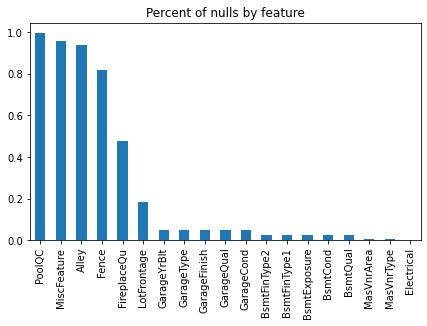

In [290]:
nullPercents = x.isna().sum()/x.shape[0]
idxs = [idx for idx, val in enumerate(nullPercents) if val>0]
nullPercents[idxs].sort_values(ascending=False).plot(kind='bar', title='Percent of nulls by feature', figsize=(7,4))

In [291]:
colsWNulls = [col for col in x.columns if x[col].isna().any()]
colsWNulls

['LotFrontage',
 'Alley',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

<AxesSubplot:title={'center':'Number of unique values per categorical column'}>

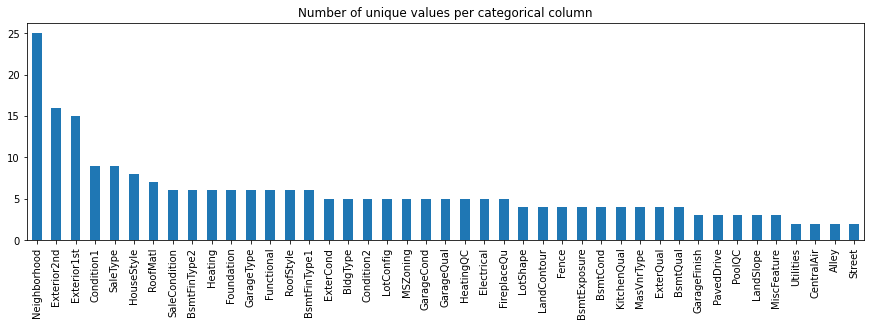

In [292]:
x[categoricals.columns].nunique().sort_values(ascending=False) \
.plot(kind='bar', title='Number of unique values per categorical column', 
      figsize=(15,4))

In [293]:
x.groupby('Neighborhood').LotArea.mean().sort_values()

Neighborhood
Blueste     1625.000000
BrDale      1805.583333
MeadowV     2508.384615
Blmngtn     3350.416667
NPkVill     3387.375000
BrkSide     7379.704545
SWISU       7797.200000
Somerst     8154.174603
IDOTRR      8168.500000
OldTown     8426.037975
StoneBr     9656.500000
CollgCr     9678.837838
Edwards     9757.973684
SawyerW     9876.600000
NAmes      10077.122699
Sawyer     10629.781250
NridgHt    10825.192982
Gilbert    11204.081967
Crawfor    11568.054054
NWAmes     11655.296296
Mitchel    11945.820513
Veenker    12257.000000
NoRidge    13943.709677
Timber     26285.612903
ClearCr    27099.440000
Name: LotArea, dtype: float64

In [294]:
rawDataframe.groupby("YearBuilt").apply(lambda df: df.loc[df.SalePrice.idxmin()])

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,...,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
YearBuilt,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1872,70,RM,50.0,5250,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,8,5,1872,1987,Gable,CompShg,MetalSd,MetalSd,None,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,54,20,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,122000
1875,50,RL,54.0,6342,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Feedr,Norm,1Fam,1.5Fin,5,8,1875,1996,Gable,CompShg,VinylSd,VinylSd,None,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,176,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,94000
1880,70,RM,90.0,9900,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,2Story,6,4,1880,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,...,0,NaN,Detchd,1930.0,Unf,1,205,Fa,TA,N,0,48,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,117500
1882,70,RM,121.0,17671,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Artery,Norm,1Fam,2Story,8,9,1882,1986,Gable,CompShg,Wd Sdng,Wd Sdng,None,...,1,Gd,Attchd,1925.0,Unf,2,424,TA,TA,P,0,169,0,0,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal,168000
1885,30,RM,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,1Fam,1Story,4,7,1885,1995,Mansard,CompShg,VinylSd,VinylSd,None,...,0,NaN,Detchd,1954.0,Unf,1,273,Fa,Fa,N,0,0,0,0,0,0,NaN,NaN,Shed,450,8,2007,WD,Normal,100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,...,0,NaN,NaN,NaN,NaN,0,0,NaN,NaN,Y,36,56,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
2007,160,FV,34.0,3604,Pave,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,...,0,NaN,Detchd,2007.0,Unf,2,540,TA,TA,Y,0,102,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Abnorml,146000
2008,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,...,3,Gd,Attchd,2008.0,Fin,2,1418,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [295]:
from numpy import mean, median, std
rawDataframe.groupby(['MSZoning', 'HouseStyle']).SalePrice.agg([len, min, max, median, mean, std])

len     min     max  median           mean            std
MSZoning HouseStyle                                                           
C (all)  1.5Fin        4   68400  108000   93888   91044.000000   18022.452959
         1Story        4   34900   81000   45652   51801.000000   21815.272678
         2.5Unf        1  133900  133900  133900  133900.000000            NaN
         2Story        1   40000   40000   40000   40000.000000            NaN
FV       1Story       18  176000  370878  208600  226248.000000   52263.771418
         2Story       47  144152  340000  197000  209328.723404   52204.421910
RH       1.5Fin        1  159434  159434  159434  159434.000000            NaN
         1.5Unf        1   76000   76000   76000   76000.000000            NaN
         1Story        6   79000  181000  113450  118816.666667   38942.543146
         2.5Fin        1  200000  200000  200000  200000.000000            NaN
         2Story        6  103600  160000  142500  137266.666667   19131.823402
         SFoyer        1  133000  133000  133000  133000.000000            NaN
RL       1.5Fin       94   79000  410000  138500  156369.872340   60831.491473
         1.5Unf        6   96500  135000  111750  113200.000000   14123.030836
         1Story      631   39300  611657  158000  181190.654517   77328.034504
         2.5Fin        4  118500  197000  185250  171500.000000   36071.687882
         2.5Unf        2  164000  214500  189250  189250.000000   35708.892450
         2Story      325   95000  755000  205000  229974.775385   87673.452394
         SFoyer       27  108959  198500  137500  143683.555556   19603.933228
         SLvl         62  107000  345000  165250  168576.129032   37795.169279
RM       1.5Fin       55   37900  256000  125000  123956.363636   32722.043559
         1.5Unf        7   87000  139400  113000  112414.285714   20231.199385
         1Story       67   52500  392500  118400  125993.820896   50875.275818
         2.5Fin        3  104000  475000  295000  291333.333333  185527.176805
         2.5Unf        8  101000  325000  128750  152312.500000   72518.439773
         2Story       66   55000  265979  122250  121654.287879   31321.922611
         SFoyer        9   75500  206300   86000  109477.777778   44091.858029
         SLvl          3   91000  148000  145000  128000.000000   32078.029865

In [296]:
N = rawDataframe.SaleType.nunique()

pt = rawDataframe.reset_index().pivot_table(index='MSZoning', columns='OverallQual', values='SaleType',
                                       aggfunc=lambda x: (len(x.unique())/N),
                                       fill_value=0)
pt['row_totals'] = pt.sum(axis=1)
pt.loc['col_totals'] = pt.sum(axis=0)
pt

OverallQual,1,2,3,4,5,6,7,8,9,10,row_totals
MSZoning,,,,,,,,,,,
C (all),0.000000,0.111111,0.111111,0.222222,0.111111,0.111111,0.000000,0.000000,0.000000,0.000000,0.666667
FV,0.000000,0.000000,0.000000,0.000000,0.000000,0.222222,0.333333,0.222222,0.222222,0.111111,1.111111
RH,0.000000,0.000000,0.111111,0.111111,0.111111,0.222222,0.111111,0.000000,0.000000,0.000000,0.666667
RL,0.111111,0.111111,0.111111,0.444444,0.666667,0.666667,0.666667,0.555556,0.222222,0.333333,3.888889
RM,0.000000,0.111111,0.111111,0.222222,0.333333,0.555556,0.222222,0.222222,0.000000,0.111111,1.888889
col_totals,0.111111,0.333333,0.444444,1.000000,1.222222,1.777778,1.333333,1.000000,0.444444,0.555556,8.222222


# feature engineer

In [297]:
x_tst = pd.read_feather(dirs.X_TST_PATH)
y_tst = pd.read_feather(dirs.Y_TST_PATH)
x_tst = x_tst.drop("Id", axis=1)
y_tst = y_tst.drop("Id", axis=1)

In [298]:
x_fe = x.copy()

In [309]:
x_tst= x_tst.fillna(value=np.nan)
x_fe = x_fe.fillna(value=np.nan)

In [310]:
columnTypes = x_fe.columns.to_series().groupby(x_fe.dtypes).groups
columnTypes = {k.name: list(v) for k, v in columnTypes.items()}

In [311]:
categoricalCols = columnTypes['object']
numericalCols = columnTypes['int64'] +  columnTypes['float64']
assert len(numericalCols) + len(categoricalCols) == x.shape[1] 

In [313]:
x_fe[categoricalCols]

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RM,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,Stone,TA,TA,No,Unf,Unf,GasA,TA,N,SBrkr,TA,Min2,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,Gilbert,Norm,Norm,1Fam,SLvl,Gable,CompShg,HdBoard,HdBoard,BrkFace,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,Norm,Norm,1Fam,SLvl,Gable,CompShg,VinylSd,VinylSd,None,TA,Gd,CBlock,TA,Gd,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR3,Lvl,AllPub,Inside,Gtl,Gilbert,RRAn,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,Gd,Av,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,BuiltIn,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,GasA,Fa,Y,SBrkr,Gd,Typ,Fa,Attchd,RFn,TA,TA,Y,Fa,GdPrv,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Gd,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1091,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,HdBoard,None,TA,TA,CBlock,Gd,TA,No,BLQ,Unf,GasA,TA,Y,SBrkr,Gd,Min2,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1092,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1.5Fin,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,Slab,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,SBrkr,TA,Typ,NaN,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1093,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Gd,Unf,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [314]:
??SimpleImputer

In [315]:
x_fe['PoolQC']

0       NaN
1       NaN
2       NaN
3       NaN
4        Fa
       ... 
1090    NaN
1091    NaN
1092    NaN
1093    NaN
1094    NaN
Name: PoolQC, Length: 1095, dtype: object

In [316]:
x_fe[categoricalCols].isna().sum()

MSZoning            0
Street              0
Alley            1030
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          5
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           25
BsmtCond           25
BsmtExposure       25
BsmtFinType1       25
BsmtFinType2       26
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         0
Functional          0
FireplaceQu       521
GarageType         56
GarageFinish       56
GarageQual         56
GarageCond         56
PavedDrive          0
PoolQC           1091
Fence             896
MiscFeature      1048
SaleType            0
SaleCondition       0
dtype: int64

In [317]:
si = SimpleImputer(strategy='most_frequent')
si.fit_transform(x_fe)

array([[70, 'RM', 60.0, ..., 2009, 'WD', 'Normal'],
       [80, 'RL', 60.0, ..., 2007, 'WD', 'Normal'],
       [80, 'RL', 60.0, ..., 2006, 'WD', 'Normal'],
       ...,
       [90, 'RM', 68.0, ..., 2010, 'WD', 'Normal'],
       [120, 'RL', 60.0, ..., 2006, 'WD', 'Normal'],
       [60, 'RL', 58.0, ..., 2010, 'WD', 'Normal']], dtype=object)

In [318]:
numericalTransformer = SimpleImputer(strategy='median')
categoricalTransformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='most_frequent')),
                                         ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numericalTransformer, numericalCols), 
                                                ('cat', categoricalTransformer, categoricalCols)])


# model

In [320]:
model = RandomForestRegressor(n_estimators=100, random_state=randomSeed)

In [324]:
modelPipeline = Pipeline(steps=[('preprocessor', preprocessor),
           
                            ('model', model)])

In [335]:
cv = cross_validate(modelPipeline, x_fe, y, cv=5,scoring=['neg_mean_squared_error', 'neg_mean_absolute_error'])

/home/alex/.local/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/alex/.local/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/alex/.local/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)
/home/alex/.local/lib/python3.6/site-packages/sklearn/pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was ex

In [329]:
??cross_validate

In [336]:
cv

{'fit_time': array([5.62628531, 5.46910906, 5.55099654, 5.49862719, 5.46124244]),
 'score_time': array([0.03150392, 0.03141284, 0.04022193, 0.02903938, 0.02898526]),
 'test_neg_mean_squared_error': array([-7.47201154e+08, -1.44236996e+09, -8.10840204e+08, -9.79378239e+08,
        -5.24017015e+08]),
 'test_neg_mean_absolute_error': array([-16916.28273973, -19531.38794521, -18401.46269406, -18011.05283105,
        -16462.42844749])}